<a href="https://colab.research.google.com/github/kblandonv/Microproyecto2IA/blob/main/equipo6_microproyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Cargar los datos de hombres y mujeres
male_df = pd.read_csv('/content/male.csv', header=1)
female_df = pd.read_csv('/content/female.csv', header=1)

# Seleccionar los años de interés y la columna de país
years_of_interest = ['1990', '2014', '2017']
columns_to_select = ['Country'] + years_of_interest

# Filtrar las columnas por los años de interés
male_data = male_df[['Country'] + years_of_interest]
female_data = female_df[['Country'] + years_of_interest]

# Renombrar las columnas para diferenciarlas
male_data.columns = ['Country'] + [f"{year}_male" for year in years_of_interest]
female_data.columns = ['Country'] + [f"{year}_female" for year in years_of_interest]

# Unir los datos de hombres y mujeres por país
merged_data = pd.merge(male_data, female_data, on='Country')

# Reemplazar los valores '..' por NaN y luego eliminar las filas con NaN
merged_data.replace('..', pd.NA, inplace=True)
merged_data.dropna(inplace=True)

# Convertir los valores de las columnas seleccionadas a float
for column in [f"{year}_male" for year in years_of_interest] + [f"{year}_female" for year in years_of_interest]:
    merged_data[column] = merged_data[column].astype(float)

# Mostrar las primeras filas del dataframe para verificar
print(merged_data.head())


       Country  1990_male  2014_male  2017_male  1990_female  2014_female  \
0  Afghanistan       82.9       82.3       82.2         43.1         46.0   
1      Albania       74.6       63.9       65.0         53.8         44.8   
2      Algeria       76.6       67.4       67.6         11.4         15.3   
3       Angola       81.3       80.5       80.2         75.0         75.5   
4    Argentina       76.0       73.5       73.0         43.2         47.2   

   2017_female  
0         48.5  
1         47.3  
2         14.9  
3         75.5  
4         49.1  


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Seleccionar solo las columnas numéricas para el clustering
data_for_clustering = merged_data[[f"{year}_male" for year in years_of_interest] + [f"{year}_female" for year in years_of_interest]]

# Convertir los datos a formato adecuado para clustering (numpy array)
X = np.array(data_for_clustering)

# Inicializar el modelo de clustering
kmeans = KMeans(n_clusters=3, random_state=42)

# Ajustar el modelo
kmeans.fit(X)

# Obtener las etiquetas de clúster
cluster_labels = kmeans.labels_

# Agregar las etiquetas de clúster al dataframe original
merged_data['Cluster'] = cluster_labels

# Mostrar las primeras filas del dataframe con las etiquetas de clúster
print(merged_data.head())


       Country  1990_male  2014_male  2017_male  1990_female  2014_female  \
0  Afghanistan       82.9       82.3       82.2         43.1         46.0   
1      Albania       74.6       63.9       65.0         53.8         44.8   
2      Algeria       76.6       67.4       67.6         11.4         15.3   
3       Angola       81.3       80.5       80.2         75.0         75.5   
4    Argentina       76.0       73.5       73.0         43.2         47.2   

   2017_female  Cluster  
0         48.5        1  
1         47.3        1  
2         14.9        2  
3         75.5        0  
4         49.1        1  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_summary = merged_data['Cluster'].value_counts()
print(cluster_summary)


Cluster
1    109
0     57
2     29
Name: count, dtype: int64


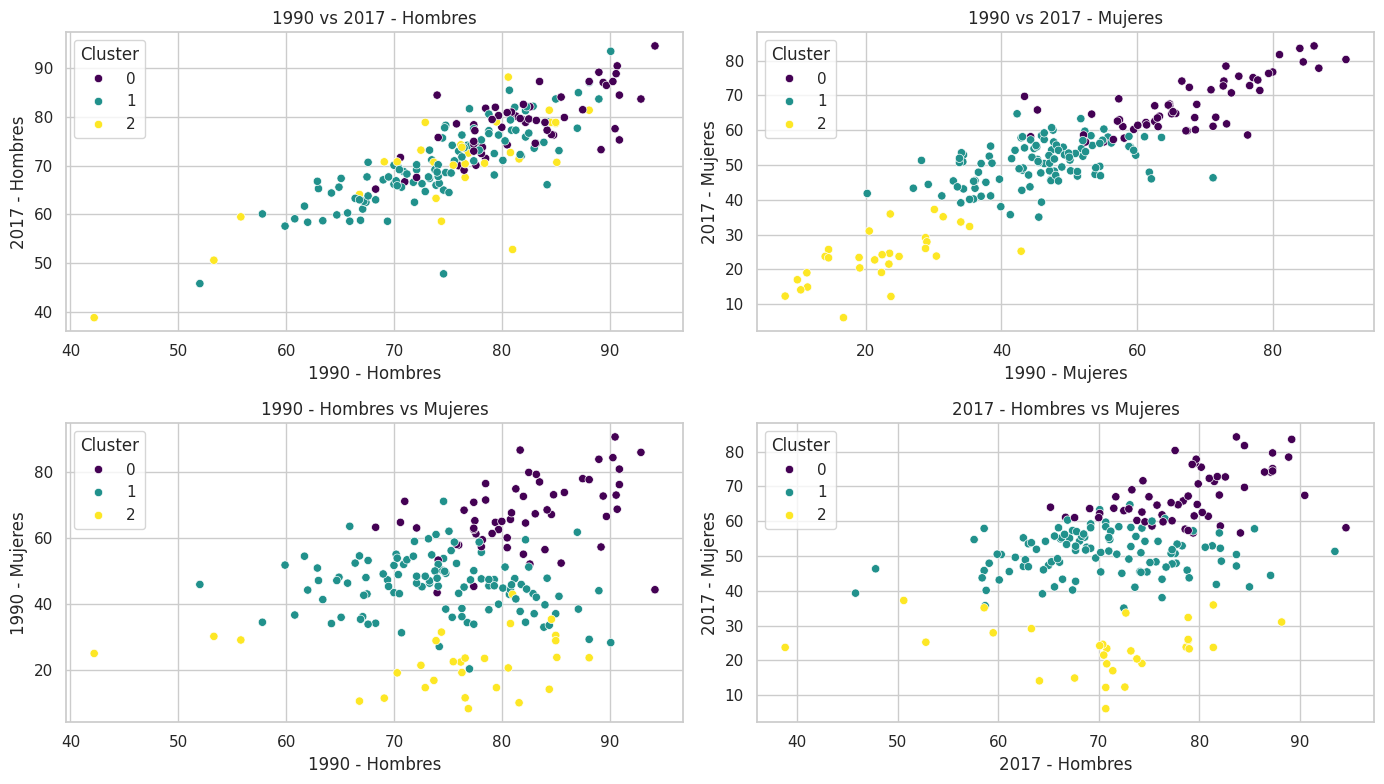

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico de dispersión para 1990 vs 2017, hombres y mujeres
plt.figure(figsize=(14, 8))

# 1990 vs 2017 para hombres
plt.subplot(2, 2, 1)
sns.scatterplot(data=merged_data, x='1990_male', y='2017_male', hue='Cluster', palette='viridis')
plt.title('1990 vs 2017 - Hombres')
plt.xlabel('1990 - Hombres')
plt.ylabel('2017 - Hombres')

# 1990 vs 2017 para mujeres
plt.subplot(2, 2, 2)
sns.scatterplot(data=merged_data, x='1990_female', y='2017_female', hue='Cluster', palette='viridis')
plt.title('1990 vs 2017 - Mujeres')
plt.xlabel('1990 - Mujeres')
plt.ylabel('2017 - Mujeres')

# 1990 Hombres vs Mujeres
plt.subplot(2, 2, 3)
sns.scatterplot(data=merged_data, x='1990_male', y='1990_female', hue='Cluster', palette='viridis')
plt.title('1990 - Hombres vs Mujeres')
plt.xlabel('1990 - Hombres')
plt.ylabel('1990 - Mujeres')

# 2017 Hombres vs Mujeres
plt.subplot(2, 2, 4)
sns.scatterplot(data=merged_data, x='2017_male', y='2017_female', hue='Cluster', palette='viridis')
plt.title('2017 - Hombres vs Mujeres')
plt.xlabel('2017 - Hombres')
plt.ylabel('2017 - Mujeres')

plt.tight_layout()
plt.show()


In [ ]:
# Agrupar los datos por clúster
clusters = merged_data.groupby('Cluster')['Country'].apply(list)

# Imprimir los países en cada clúster
for cluster, countries in clusters.items():
    print(f"Cluster {cluster}:")
    for country in countries:
        print(f" - {country}")
    print("\n")


Cluster 0:
 - Angola
 - Bahamas
 - Barbados
 - Benin
 - Bolivia (Plurinational State of)
 - Botswana
 - Burkina Faso
 - Burundi
 - Cambodia
 - Cameroon
 - Canada
 - Central African Republic
 - Chad
 - China
 - Colombia
 - Congo
 - Congo (Democratic Republic of the)
 - Eritrea
 - Ethiopia
 - Georgia
 - Ghana
 - Guinea
 - Guinea-Bissau
 - Haiti
 - Iceland
 - Jamaica
 - Kazakhstan
 - Kenya
 - Korea (Democratic People's Rep. of)
 - Lao People's Democratic Republic
 - Lesotho
 - Madagascar
 - Malawi
 - Mali
 - Mozambique
 - Nepal
 - New Zealand
 - Niger
 - Paraguay
 - Peru
 - Qatar
 - Rwanda
 - Solomon Islands
 - South Sudan
 - Sweden
 - Switzerland
 - Tanzania (United Republic of)
 - Thailand
 - Togo
 - Uganda
 - Vanuatu
 - Viet Nam
 - Zambia
 - Zimbabwe
 - East Asia and the Pacific
 - Sub-Saharan Africa
 - Least Developed Countries


Cluster 1:
 - Afghanistan
 - Albania
 - Argentina
 - Armenia
 - Australia
 - Austria
 - Azerbaijan
 - Bahrain
 - Belarus
 - Belgium
 - Belize
 - Bhutan
 - Bo